In [97]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [98]:
#loading in the dataframe from the CSV file
df = pd.read_csv("SFA Price History Data 15 Hours CSV.csv")
#making sure it's loaded correctly
df.head(10)

,Years,Terms per year,Matriculation and Student Activity Fee,Matriculation Fee,Tuition Fee,SB 1907 Tuition,Student Service Fee,Student Activity Fee,Optional Fee,General Fees,...,International Education Fee,"""Average of Resident Tuition and Fees"" THECB",Unnamed: 28,CPI Annual Avg,Rate of Inflation,Federal Minimum Wage,Unnamed: 32,Amount of Types of Fees,Total of Fees per year,Hours at minimum wage to pay fees
0,1923,3,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,17.1,0.0,NaN,NaN,1.0,36,NaN
1,1925,3,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,17.5,2.3,NaN,NaN,1.0,36,NaN
2,1927,3,NaN,10.0,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,17.4,-0.6,NaN,NaN,2.0,42,NaN
3,1929,3,NaN,10.0,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,17.1,-1.7,NaN,NaN,3.0,54,NaN
4,1931,3,NaN,10.0,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,15.2,-11.1,NaN,NaN,4.0,57,NaN
5,1933,2,NaN,25.0,NaN,NaN,NaN,NaN,7.5,NaN,...,NaN,NaN,NaN,13.0,-14.5,NaN,NaN,3.0,71,NaN
6,1934,2,NaN,25.0,NaN,NaN,NaN,NaN,7.5,NaN,...,NaN,NaN,NaN,13.4,3.1,NaN,NaN,3.0,71,NaN
7,1935,2,NaN,25.0,NaN,NaN,NaN,NaN,7.5,NaN,...,NaN,NaN,NaN,13.7,2.2,NaN,NaN,3.0,71,NaN
8,1936,2,NaN,25.0,NaN,NaN,NaN,NaN,7.5,NaN,...,NaN,NaN,NaN,13.9,1.5,NaN,NaN,3.0,71,NaN
9,1937,2,NaN,25.0,NaN,NaN,NaN,NaN,7.5,NaN,...,NaN,NaN,NaN,14.4,3.6,NaN,NaN,3.0,71,NaN


In [99]:
#Using the tail print from the last cell to find the row indexes of the NaN rows
columns_to_drop = [28, 31]
df = df.drop(columns=df.columns[columns_to_drop])
#Printing the tail again, making sure I deleted the correct rows
df.tail(8)

,Years,Terms per year,Matriculation and Student Activity Fee,Matriculation Fee,Tuition Fee,SB 1907 Tuition,Student Service Fee,Student Activity Fee,Optional Fee,General Fees,...,Medical Service Fee,Student Health Service Fee,International Education Fee,"""Average of Resident Tuition and Fees"" THECB",CPI Annual Avg,Rate of Inflation,Unnamed: 32,Amount of Types of Fees,Total of Fees per year,Hours at minimum wage to pay fees
76,2013,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8458.0,232.957,1.5,NaN,NaN,8458,1166.620690
77,2014,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8772.0,236.736,1.6,NaN,NaN,8772,1209.931034
78,2015,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9312.0,237.017,0.1,NaN,NaN,9312,1284.413793
79,2016,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9538.0,240.007,1.3,NaN,NaN,9538,1315.586207
80,2017,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9538.0,245.120,2.1,NaN,NaN,9538,1315.586207
81,2018,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10288.0,251.107,2.4,NaN,NaN,10288,1419.034483
82,2019,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10946.0,255.657,1.8,NaN,NaN,10946,1509.793103
83,2020,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10600.0,258.811,1.2,NaN,NaN,10600,1462.068966


In [100]:
for col in df.columns:
    if isinstance(df.at[32, col], str) and df.at[32, col].endswith('\t'):
        df[col] = df[col].str.rstrip('\t')
        df[col] = df[col].str.rstrip('\n')
        df.columns = df.columns.str.strip()
print(df.iloc[32])

Years                                                       1963.0
Terms per year                                                 2.0
Matriculation and Student Activity Fee                         NaN
Matriculation Fee                                              NaN
Tuition Fee                                                   50.0
SB 1907 Tuition                                                NaN
Student Service Fee                                           30.0
Student Activity Fee                                           NaN
Optional Fee                                                   NaN
General Fees                                                   NaN
Building Use Fee                                               8.0
Student Center Fee                                             NaN
Computer Use Fee                                               NaN
Library Incidental Fee                                         NaN
Library Fee                                                   

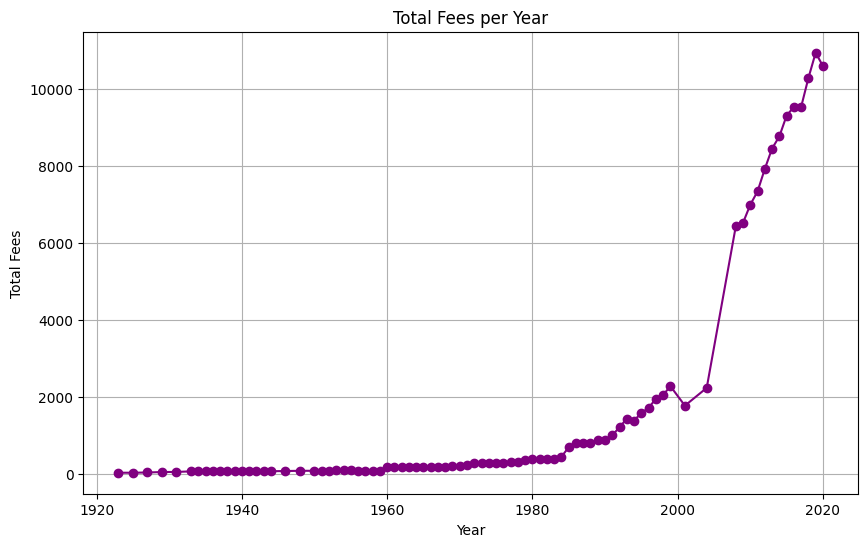

In [101]:
years_range = range(1923, 2021)
x_values = []
y_values = []

for year in years_range:
    condition = (df['Years'] == year)
    total_fees = df[condition]['Total of Fees per year'].values
    
    if len(total_fees) > 0:
        x_values.append(year)  # Append the year to x_values list
        y_values.append(total_fees[0])  # Append the total fees to y_values list

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', color='purple')
plt.title('Total Fees per Year')
plt.xlabel('Year')
plt.ylabel('Total Fees')
plt.grid(True)
plt.show()

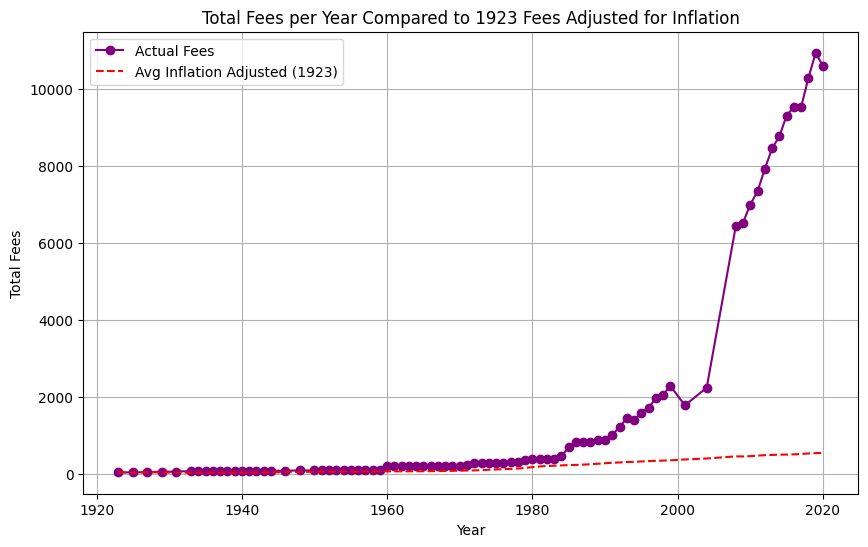

In [102]:
years_range = range(1923, 2021)
x_values = []
y_values = []
average_inflation_adjusted = []

# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

prev_year_fee = None  # To store the fee from the previous year

for year in years_range:
    condition = (df['Years'] == year)
    total_fees = df[condition]['Total of Fees per year'].values
    
    if len(total_fees) > 0:
        x_values.append(year)
        y_values.append(total_fees[0])
        
        prev_year_fee = y_values[-1]  # Store the current year's fee for the next iteration

# Calculate average price adjusted for inflation from 1923 if data is available
avg_price_1923 = y_values[0] if len(y_values) > 0 else None
if avg_price_1923 is not None:
    for i, year in enumerate(years_range):
        if i == 0:
            average_inflation_adjusted.append(avg_price_1923)
        else:
            condition = (df['Years'] == year)
            total_fees = df[condition]['Total of Fees per year'].values
            if len(total_fees) > 0:
                inflation_rate = df[condition]['Rate of Inflation'].values[0] / 100
                avg_price_1923 *= (1 + inflation_rate)
                average_inflation_adjusted.append(avg_price_1923)

plt.figure(figsize=(10, 6))

# Plot the actual data
plt.plot(x_values, y_values, marker='o', label='Actual Fees', color='purple')

# Plot the average inflation-adjusted line from 1923
if avg_price_1923 is not None:
    plt.plot(x_values, average_inflation_adjusted, linestyle='dashed', color='red', label='Avg Inflation Adjusted (1923)')

plt.title('Total Fees per Year Compared to 1923 Fees Adjusted for Inflation')
plt.xlabel('Year')
plt.ylabel('Total Fees')
plt.legend()
plt.grid(True)
plt.show()

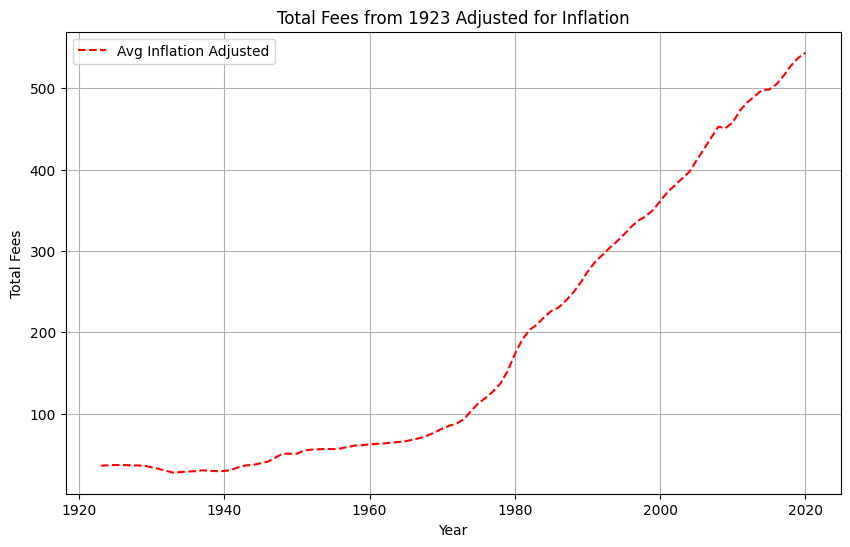

In [103]:
years_range = range(1923, 2021)
x_values = []
y_values = []
average_inflation_adjusted = []

# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

prev_year_fee = None  # To store the fee from the previous year

for year in years_range:
    condition = (df['Years'] == year)
    total_fees = df[condition]['Total of Fees per year'].values
    
    if len(total_fees) > 0:
        x_values.append(year)
        y_values.append(total_fees[0])
        
        prev_year_fee = y_values[-1]  # Store the current year's fee for the next iteration

# Calculate average price adjusted for inflation from 1923 if data is available
avg_price_1923 = y_values[0] if len(y_values) > 0 else None
if avg_price_1923 is not None:
    for i, year in enumerate(years_range):
        if i == 0:
            average_inflation_adjusted.append(avg_price_1923)
        else:
            condition = (df['Years'] == year)
            total_fees = df[condition]['Total of Fees per year'].values
            if len(total_fees) > 0:
                inflation_rate = df[condition]['Rate of Inflation'].values[0] / 100
                avg_price_1923 *= (1 + inflation_rate)
                average_inflation_adjusted.append(avg_price_1923)

plt.figure(figsize=(10, 6))

# Plot the average inflation-adjusted line from 1923
if avg_price_1923 is not None:
    plt.plot(x_values, average_inflation_adjusted, linestyle='dashed', color='red', label='Avg Inflation Adjusted')

plt.title('Total Fees from 1923 Adjusted for Inflation')
plt.xlabel('Year')
plt.ylabel('Total Fees')
plt.legend()
plt.grid(True)
plt.show()

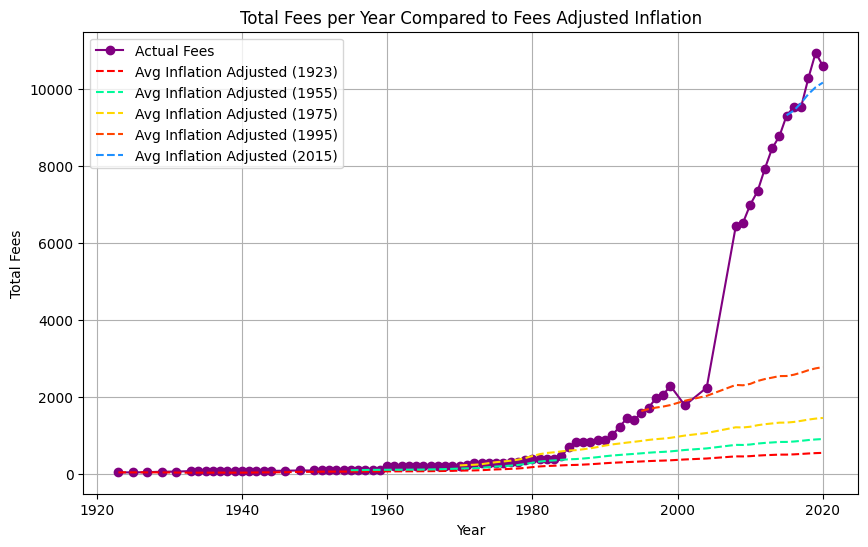

In [104]:
# Function to calculate average inflation-adjusted prices
plt.style.use('default')
def calculate_inflation_adjusted_prices(start_year, years_range):
    x_values = []
    y_values = []
    average_inflation_adjusted = []

    prev_year_fee = None

    for year in years_range:
        condition = (df['Years'] == year)
        total_fees = df[condition]['Total of Fees per year'].values

        if len(total_fees) > 0:
            x_values.append(year)
            y_values.append(total_fees[0])

            if prev_year_fee is None:
                prev_year_fee = y_values[-1]

            inflation_rate = df[condition]['Rate of Inflation'].values[0] / 100
            prev_year_fee *= (1 + inflation_rate)
            average_inflation_adjusted.append(prev_year_fee)

    return x_values, y_values, average_inflation_adjusted

plt.figure(figsize=(10, 6))

x_values_1985, y_values_1985, avg_inflation_1985 = calculate_inflation_adjusted_prices(1985, range(1985, 2021))
x_values_1970, y_values_1970, avg_inflation_1970 = calculate_inflation_adjusted_prices(1970, range(1970, 2021))
x_values_1955, y_values_1955, avg_inflation_1955 = calculate_inflation_adjusted_prices(1955, range(1955, 2021))
x_values_1923, y_values_1923, avg_inflation_1923 = calculate_inflation_adjusted_prices(1923, range(1923, 2021))
x_values_1995, y_values_1995, avg_inflation_1995 = calculate_inflation_adjusted_prices(1995, range(1995, 2021))
x_values_2015, y_values_2015, avg_inflation_2015 = calculate_inflation_adjusted_prices(2015, range(2015, 2021))


plt.plot(x_values_1923, y_values_1923, marker='o', label='Actual Fees', color='purple')
plt.plot(x_values_1923, avg_inflation_1923, linestyle='dashed', color='red', label='Avg Inflation Adjusted (1923)')
plt.plot(x_values_1955, avg_inflation_1955, linestyle='dashed', color='mediumspringgreen', label='Avg Inflation Adjusted (1955)')
plt.plot(x_values_1970, avg_inflation_1970, linestyle='dashed', color='gold', label='Avg Inflation Adjusted (1975)')
plt.plot(x_values_1995, avg_inflation_1995, linestyle='dashed', color='orangered', label='Avg Inflation Adjusted (1995)')
plt.plot(x_values_2015, avg_inflation_2015, linestyle='dashed', color='dodgerblue', label='Avg Inflation Adjusted (2015)')

plt.title('Total Fees per Year Compared to Fees Adjusted Inflation')
plt.xlabel('Year')
plt.ylabel('Total Fees')
plt.legend()
plt.grid(True)
plt.show()


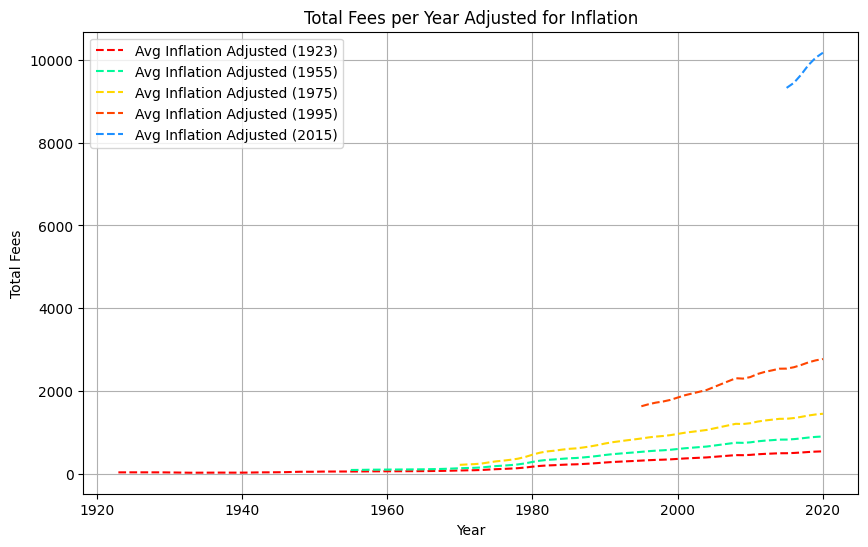

In [105]:
plt.style.use('default')
def calculate_inflation_adjusted_prices(start_year, years_range):
    x_values = []
    y_values = []
    average_inflation_adjusted = []

    prev_year_fee = None

    for year in years_range:
        condition = (df['Years'] == year)
        total_fees = df[condition]['Total of Fees per year'].values

        if len(total_fees) > 0:
            x_values.append(year)
            y_values.append(total_fees[0])

            if prev_year_fee is None:
                prev_year_fee = y_values[-1]

            inflation_rate = df[condition]['Rate of Inflation'].values[0] / 100
            prev_year_fee *= (1 + inflation_rate)
            average_inflation_adjusted.append(prev_year_fee)

    return x_values, y_values, average_inflation_adjusted

plt.figure(figsize=(10, 6))

x_values_1985, y_values_1985, avg_inflation_1985 = calculate_inflation_adjusted_prices(1985, range(1985, 2021))
x_values_1970, y_values_1970, avg_inflation_1970 = calculate_inflation_adjusted_prices(1970, range(1970, 2021))
x_values_1955, y_values_1955, avg_inflation_1955 = calculate_inflation_adjusted_prices(1955, range(1955, 2021))
x_values_1923, y_values_1923, avg_inflation_1923 = calculate_inflation_adjusted_prices(1923, range(1923, 2021))
x_values_1995, y_values_1995, avg_inflation_1995 = calculate_inflation_adjusted_prices(1995, range(1995, 2021))
x_values_2015, y_values_2015, avg_inflation_2015 = calculate_inflation_adjusted_prices(2015, range(2015, 2021))



plt.plot(x_values_1923, avg_inflation_1923, linestyle='dashed', color='red', label='Avg Inflation Adjusted (1923)')
plt.plot(x_values_1955, avg_inflation_1955, linestyle='dashed', color='mediumspringgreen', label='Avg Inflation Adjusted (1955)')
plt.plot(x_values_1970, avg_inflation_1970, linestyle='dashed', color='gold', label='Avg Inflation Adjusted (1975)')
plt.plot(x_values_1995, avg_inflation_1995, linestyle='dashed', color='orangered', label='Avg Inflation Adjusted (1995)')
plt.plot(x_values_2015, avg_inflation_2015, linestyle='dashed', color='dodgerblue', label='Avg Inflation Adjusted (2015)')

plt.title('Total Fees per Year Adjusted for Inflation')
plt.xlabel('Year')
plt.ylabel('Total Fees')
plt.legend()
plt.grid(True)
plt.show()

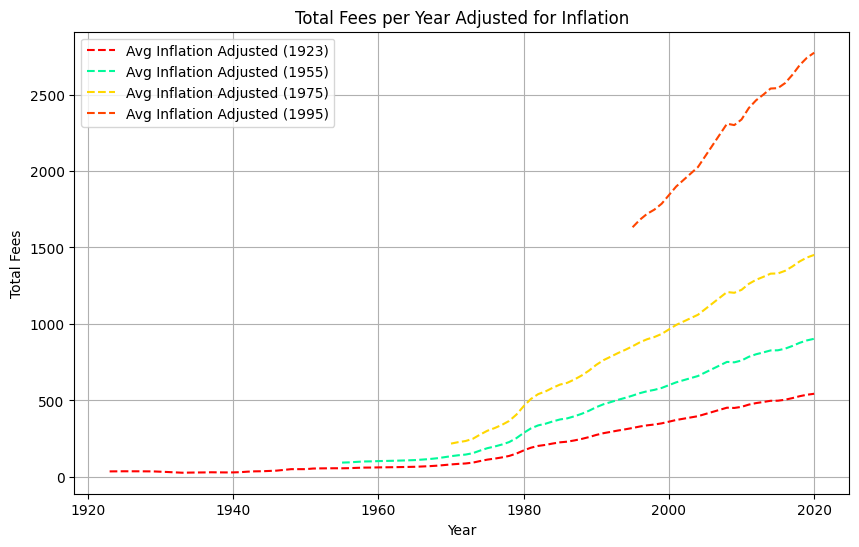

In [106]:
plt.style.use('default')
def calculate_inflation_adjusted_prices(start_year, years_range):
    x_values = []
    y_values = []
    average_inflation_adjusted = []

    prev_year_fee = None

    for year in years_range:
        condition = (df['Years'] == year)
        total_fees = df[condition]['Total of Fees per year'].values

        if len(total_fees) > 0:
            x_values.append(year)
            y_values.append(total_fees[0])

            if prev_year_fee is None:
                prev_year_fee = y_values[-1]

            inflation_rate = df[condition]['Rate of Inflation'].values[0] / 100
            prev_year_fee *= (1 + inflation_rate)
            average_inflation_adjusted.append(prev_year_fee)

    return x_values, y_values, average_inflation_adjusted

plt.figure(figsize=(10, 6))

x_values_1985, y_values_1985, avg_inflation_1985 = calculate_inflation_adjusted_prices(1985, range(1985, 2021))
x_values_1970, y_values_1970, avg_inflation_1970 = calculate_inflation_adjusted_prices(1970, range(1970, 2021))
x_values_1955, y_values_1955, avg_inflation_1955 = calculate_inflation_adjusted_prices(1955, range(1955, 2021))
x_values_1923, y_values_1923, avg_inflation_1923 = calculate_inflation_adjusted_prices(1923, range(1923, 2021))
x_values_1995, y_values_1995, avg_inflation_1995 = calculate_inflation_adjusted_prices(1995, range(1995, 2021))



plt.plot(x_values_1923, avg_inflation_1923, linestyle='dashed', color='red', label='Avg Inflation Adjusted (1923)')
plt.plot(x_values_1955, avg_inflation_1955, linestyle='dashed', color='mediumspringgreen', label='Avg Inflation Adjusted (1955)')
plt.plot(x_values_1970, avg_inflation_1970, linestyle='dashed', color='gold', label='Avg Inflation Adjusted (1975)')
plt.plot(x_values_1995, avg_inflation_1995, linestyle='dashed', color='orangered', label='Avg Inflation Adjusted (1995)')

plt.title('Total Fees per Year Adjusted for Inflation')
plt.xlabel('Year')
plt.ylabel('Total Fees')
plt.legend()
plt.grid(True)
plt.show()

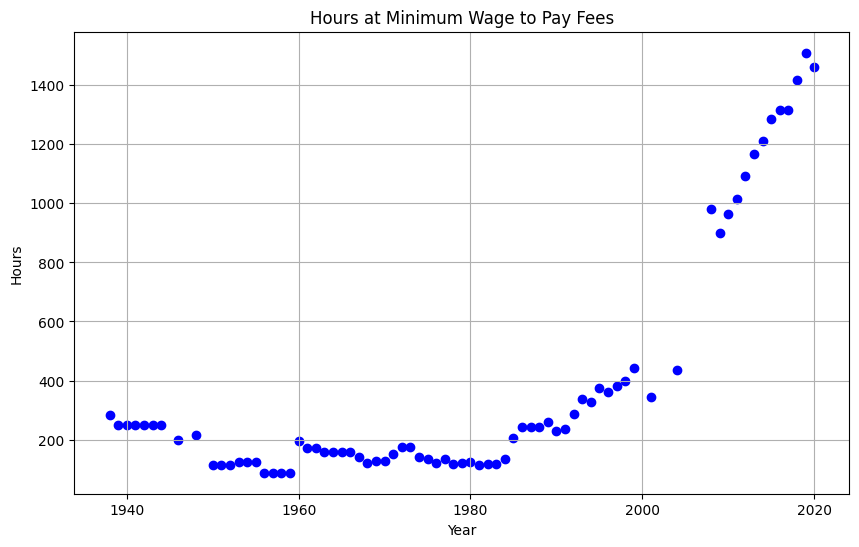

In [107]:
years_range = range(1923, 2021)
hours_to_pay_fees = []

for year in years_range:
    condition = (df['Years'] == year)
    hours = df[condition]['Hours at minimum wage to pay fees'].values
    if len(hours) > 0:
        hours_to_pay_fees.append(hours[0])
    else:
        hours_to_pay_fees.append(None)  # Append None for missing data

plt.figure(figsize=(10, 6))

plt.scatter(years_range, hours_to_pay_fees, color='blue', marker='o')
plt.title('Hours at Minimum Wage to Pay Fees')
plt.xlabel('Year')
plt.ylabel('Hours')
plt.grid(True)
plt.show()


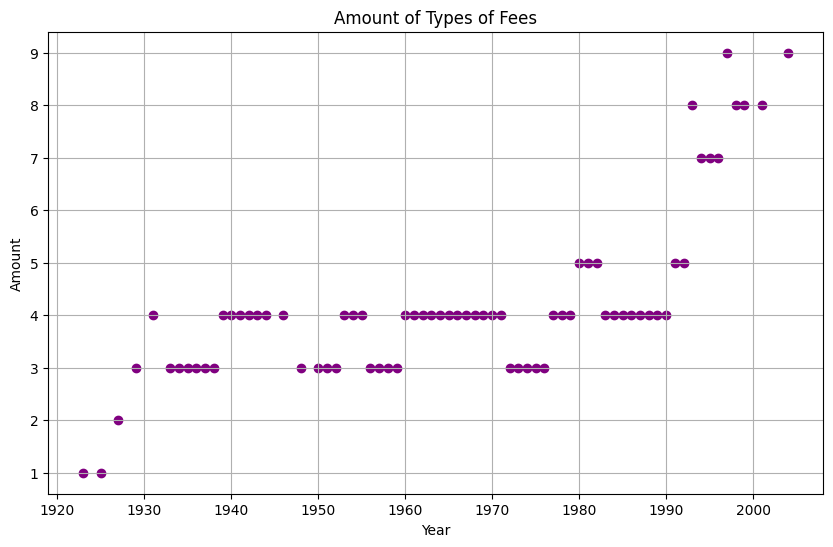

In [108]:
years_range = range(1923, 2021)
amount_of_fees = []


for year in years_range:
    condition = (df['Years'] == year)
    amount = df[condition]['Amount of Types of Fees'].values
    if len(amount) > 0:
        amount_of_fees.append(amount[0])
    else:
        amount_of_fees.append(None)  # Append None for missing data

plt.figure(figsize=(10, 6))

plt.scatter(years_range, amount_of_fees, color='purple', marker='o')
plt.title('Amount of Types of Fees')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

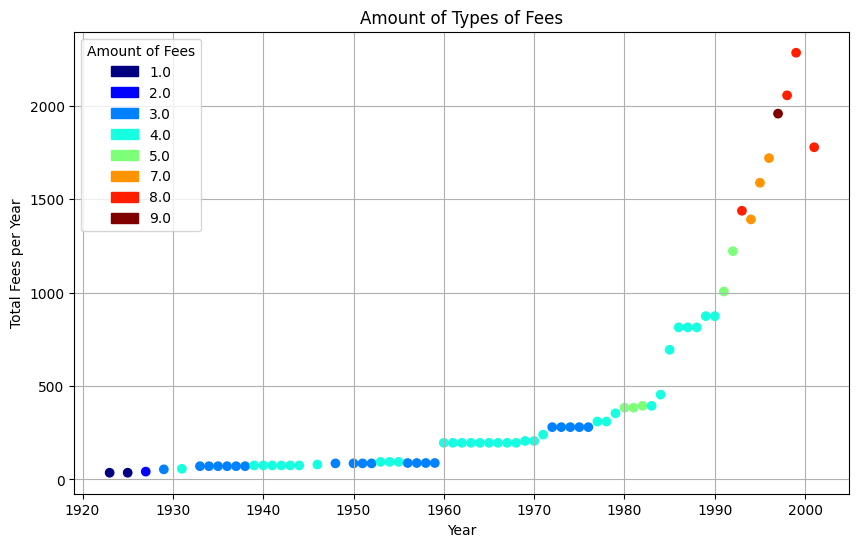

In [109]:
from matplotlib.patches import Patch

years_range = range(1923, 2004)
amount_of_fees = []
total_fees_per_year = []

# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

for year in years_range:
    condition = (df['Years'] == year)
    amount = df[condition]['Amount of Types of Fees'].values
    total_fees = df[condition]['Total of Fees per year'].values
    if len(amount) > 0 and len(total_fees) > 0:
        amount_of_fees.append(amount[0])
        total_fees_per_year.append(total_fees[0])
    else:
        amount_of_fees.append(None)  # Append None for missing data
        total_fees_per_year.append(None)  # Append None for missing data

# Determine colors based on amount of fees
colors = []
for amount in amount_of_fees:
    if amount is not None:
        normalized_amount = (amount - 1) / (9 - 1)  # Normalize to a value between 0 and 1
        color = plt.cm.jet(normalized_amount)  # Use jet colormap
        colors.append(color)
    else:
        colors.append('gray')  # Default gray for missing data

plt.figure(figsize=(10, 6))

scatter = plt.scatter(years_range, total_fees_per_year, c=colors, marker='o')

# Create a dictionary to track unique colors and labels for the legend
legend_dict = {}
for amount, color in zip(amount_of_fees, colors):
    if amount is not None:
        legend_dict[amount] = color

# Sort the keys (fees) in sequential order
sorted_keys = sorted(legend_dict.keys())

# Create custom color patches and labels for legend
legend_patches = [Patch(color=legend_dict[amount], label=str(amount)) for amount in sorted_keys]

plt.legend(handles=legend_patches, title='Amount of Fees', loc='upper left')
plt.title('Amount of Types of Fees')
plt.xlabel('Year')
plt.ylabel('Total Fees per Year')
plt.grid(True)
plt.show()